In [97]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [98]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [99]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [6]:
print(train.isnull().sum()) # check for missing values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
f = train['Fare'].unique()

In [100]:
bn = [0,10,20,50,100,200,300]
l = ['<10','10-20','20-50','50-100','100-200','200-300']

train['Fare_Group'] = pd.cut(train['Fare'],bn,labels=l)
gr = train.groupby('Fare_Group')

f_l_10 = gr.get_group('<10')
f_10_20 = gr.get_group('10-20')
f_20_50 = gr.get_group('20-50')
f_50_100 = gr.get_group('50-100')
f_100_200 = gr.get_group('100-200')
f_200_300 = gr.get_group('200-300')

In [101]:
f_200_300

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Group
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,200-300
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,200-300
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,200-300
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,200-300
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,200-300
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,200-300
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,200-300
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,200-300
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,200-300
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,200-300


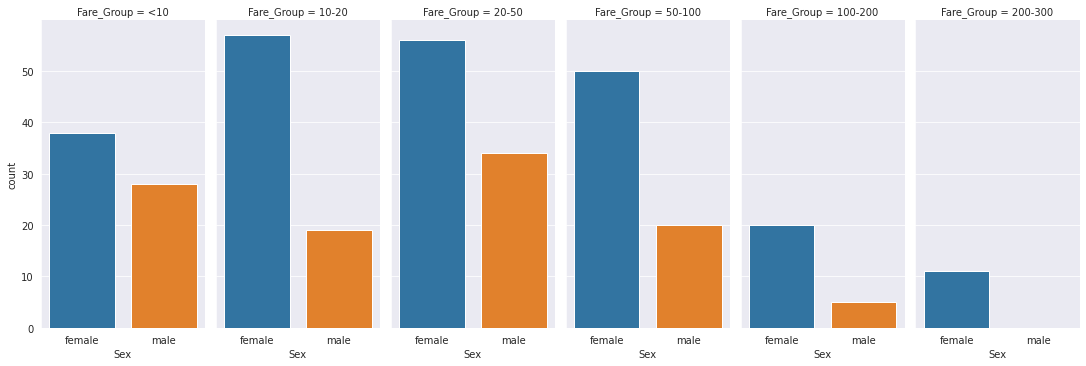

In [102]:
sur_sf = train[['Survived','Sex','Fare_Group']] 
sur_sf = sur_sf.loc[sur_sf['Survived'] == 1]
#sur_f = sur_sex[sur_sex["Sex"] == 'female']
#sur_m = sur_sex[sur_sex["Sex"] == 'male']
sns.catplot(x='Sex',col='Fare_Group',data=sur_sf,kind='count',height=5,aspect=1/2)

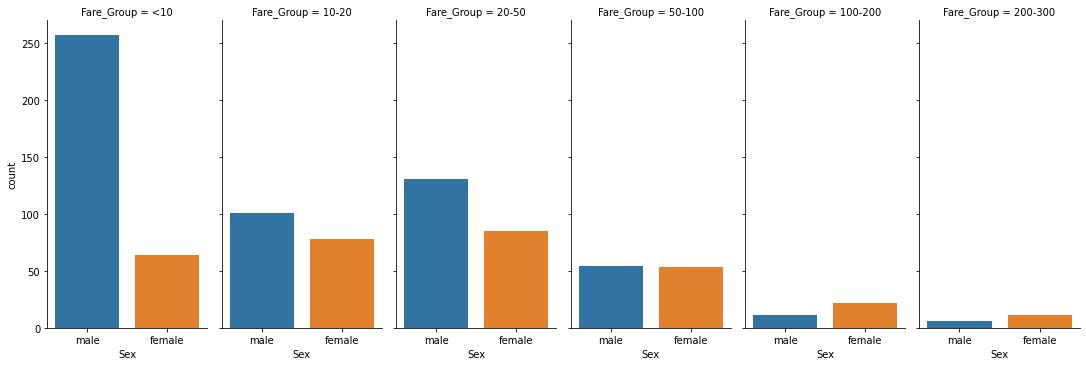

In [11]:
sns.catplot(x='Sex',col='Fare_Group',data=train,kind='count',height=5,aspect=1/2)

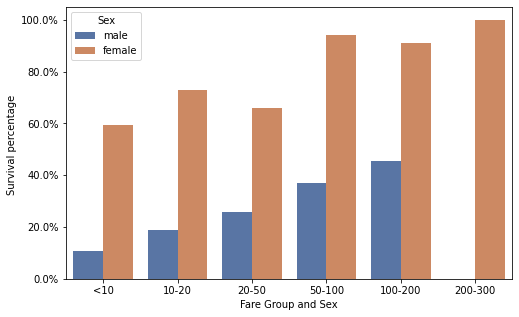

In [12]:
fig, ax = plt.subplots()
def percent(x,pos):
    return '{:1.1f}%'.format(x*100)

ax1 = sns.barplot(x='Fare_Group',y='Survived',data=train,hue='Sex',ci=None,palette="deep")
ax1.set_xlabel('Fare Group and Sex')
ax1.set_ylabel('Survival percentage ')

ax1.yaxis.set_major_formatter(percent)


fig.set_figwidth(8)
fig.set_figheight(5)

In [13]:
g = train[['Sex','Survived']].groupby('Sex').count()
g.head()

,Survived
Sex,
female,314
male,577


In [14]:
sur_sex = train[['Survived','Sex']] 
sur_sex = sur_sex.loc[sur_sex['Survived'] == 1]
sur_f = sur_sex[sur_sex["Sex"] == 'female']
sur_m = sur_sex[sur_sex["Sex"] == 'male']


In [15]:
sur_sex.groupby("Sex").count()

,Survived
Sex,
female,233
male,109


In [16]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [17]:
train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


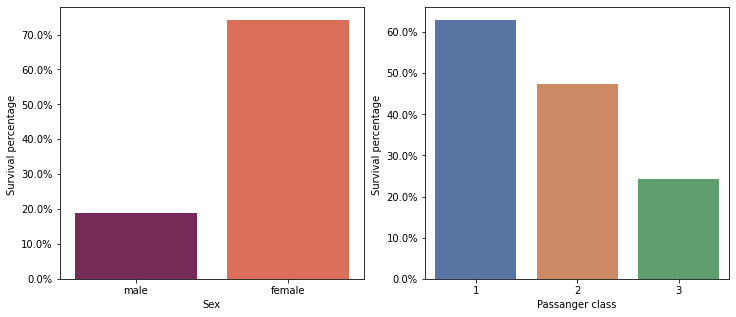

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2)
def percent(x,pos):
    return '{:1.1f}%'.format(x*100)
ax1.yaxis.set_major_formatter(percent)

ax1 = sns.barplot(ax=ax1,x='Sex',y='Survived',data=train,ci=None,palette="rocket")
ax1.set_xlabel('Sex')
ax1.set_ylabel('Survival percentage ')


ax1.yaxis.set_major_formatter(percent)

ax2 = sns.barplot(ax=ax2,x='Pclass',y='Survived',data=train,ci=None,palette="deep")
ax2.yaxis.set_major_formatter(percent)

ax2.set_xlabel('Passanger class')
ax2.set_ylabel('Survival percentage ')


fig.set_figwidth(12)
fig.set_figheight(5)


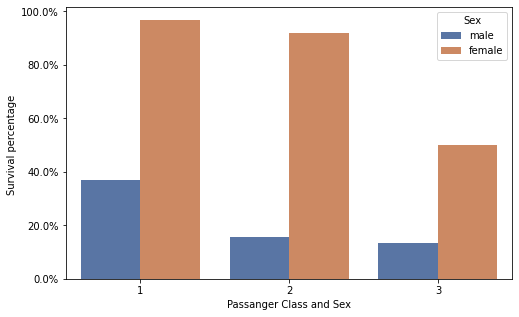

In [19]:
fig, ax = plt.subplots()
def percent(x,pos):
    return '{:1.1f}%'.format(x*100)

ax1 = sns.barplot(x='Pclass',y='Survived',data=train,hue='Sex',ci=None,palette="deep")
ax1.set_xlabel('Passanger Class and Sex')
ax1.set_ylabel('Survival percentage ')

ax1.yaxis.set_major_formatter(percent)


fig.set_figwidth(8)
fig.set_figheight(5)

In [72]:
bn = [0,15,25,65,90]
l = ['Children','Youth','Adults','Seniors']

train['Age_Group'] = pd.cut(train['Age'],bn,labels=l)

gr = train.groupby('Age_Group')

Children = gr.get_group('Children')
Youth = gr.get_group('Youth')
Adults = gr.get_group('Adults')
Seniors = gr.get_group('Seniors')

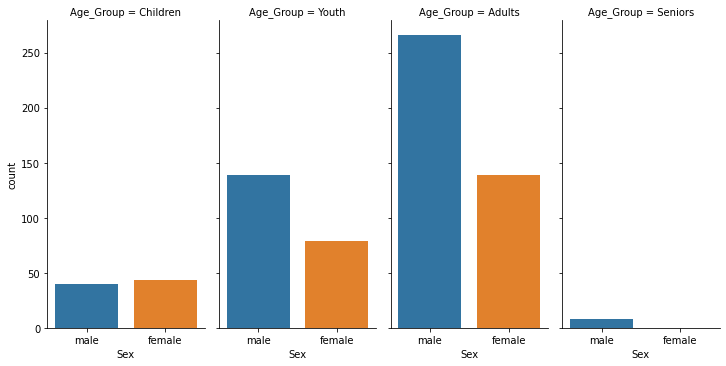

In [21]:
sns.catplot(x='Sex',col='Age_Group',data=train,kind='count',height=5,aspect=1/2)



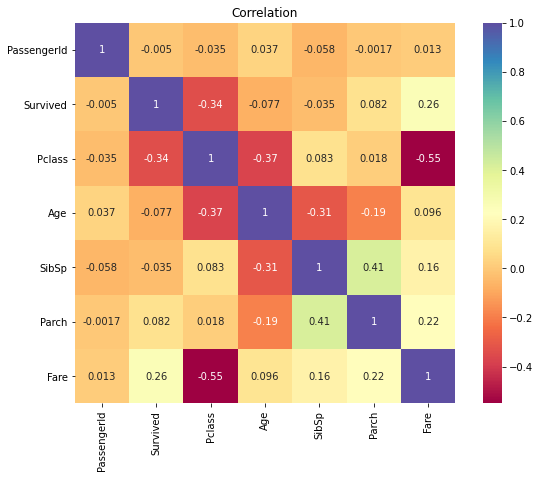

In [22]:
fig, ax = plt.subplots()

ax = sns.heatmap(train.corr(),annot=True,cmap=sns.color_palette("Spectral", as_cmap=True),square=True)


ax.set_title("Correlation")
fig.set_figwidth(10)
fig.set_figheight(7)

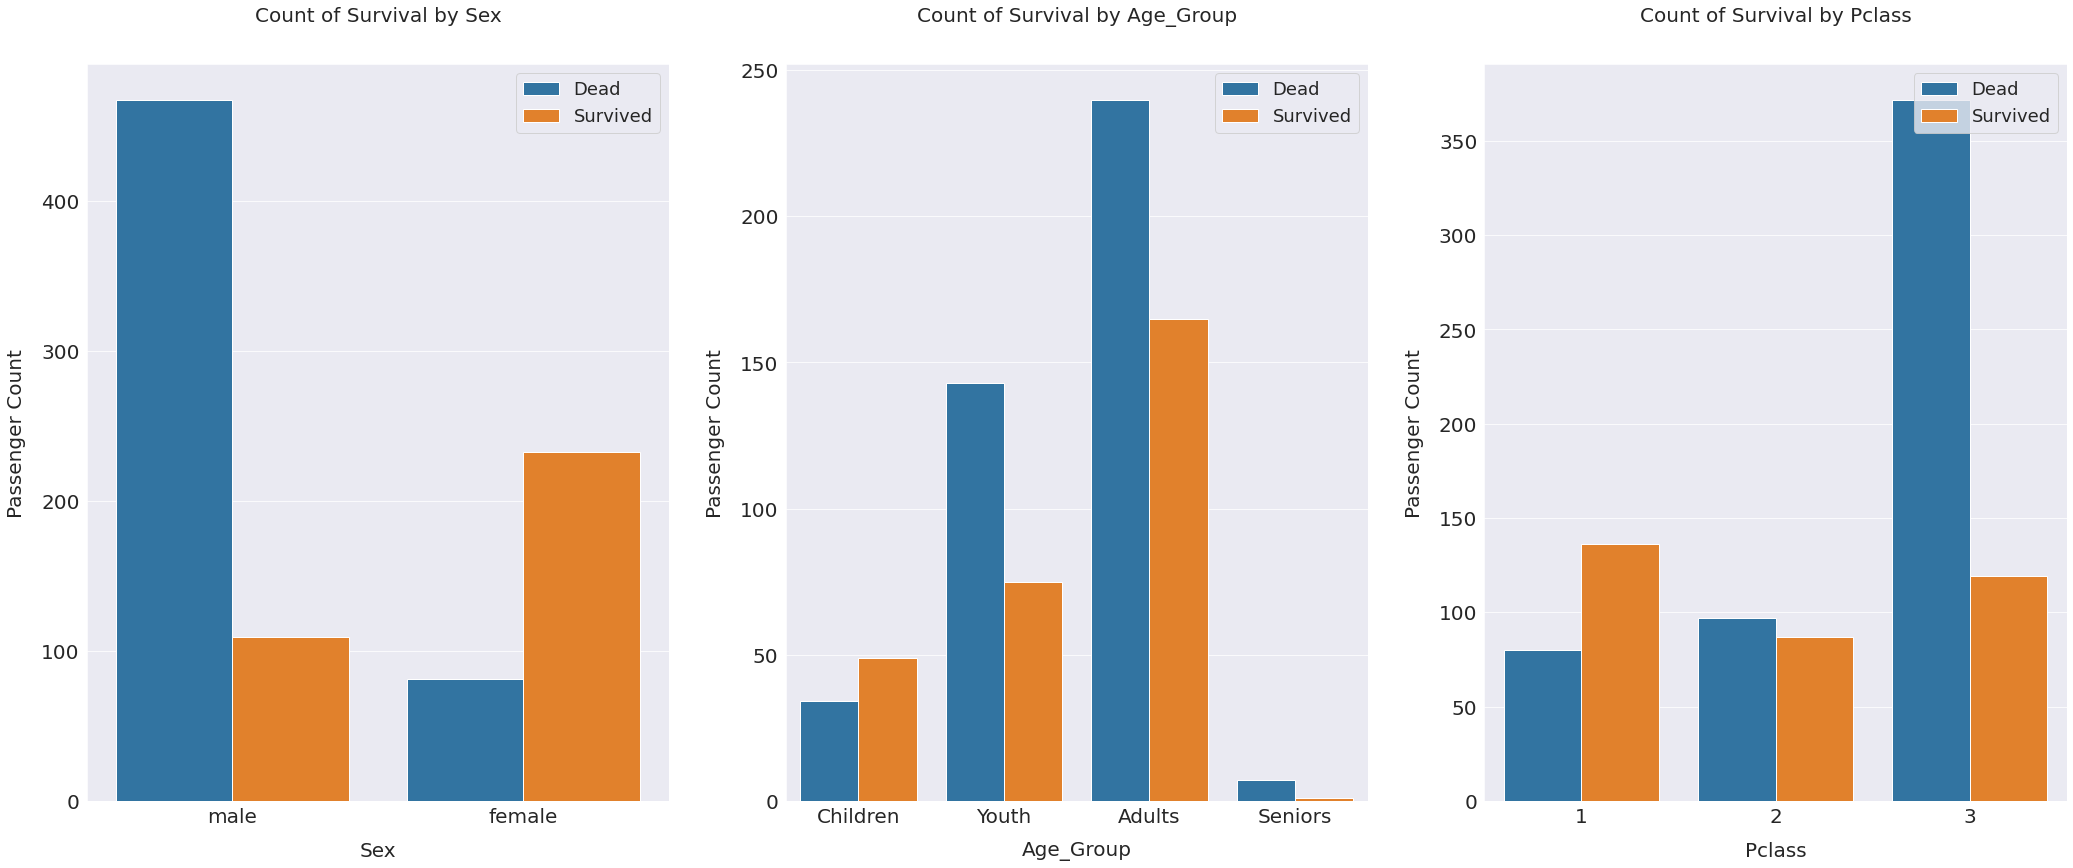

In [23]:
feat = ['Sex', 'Age_Group','Pclass']

fig2, ax2 = plt.subplots(figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)
sns.set_style("darkgrid")
for i, f in enumerate(feat, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=f, hue='Survived', data=train)
    
    plt.xlabel('{}'.format(f), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Dead', 'Survived'], loc='upper right', prop={'size': 18})
    plt.title('Count of Survival by {}'.format(f), size=20, y=1.05)

plt.show()

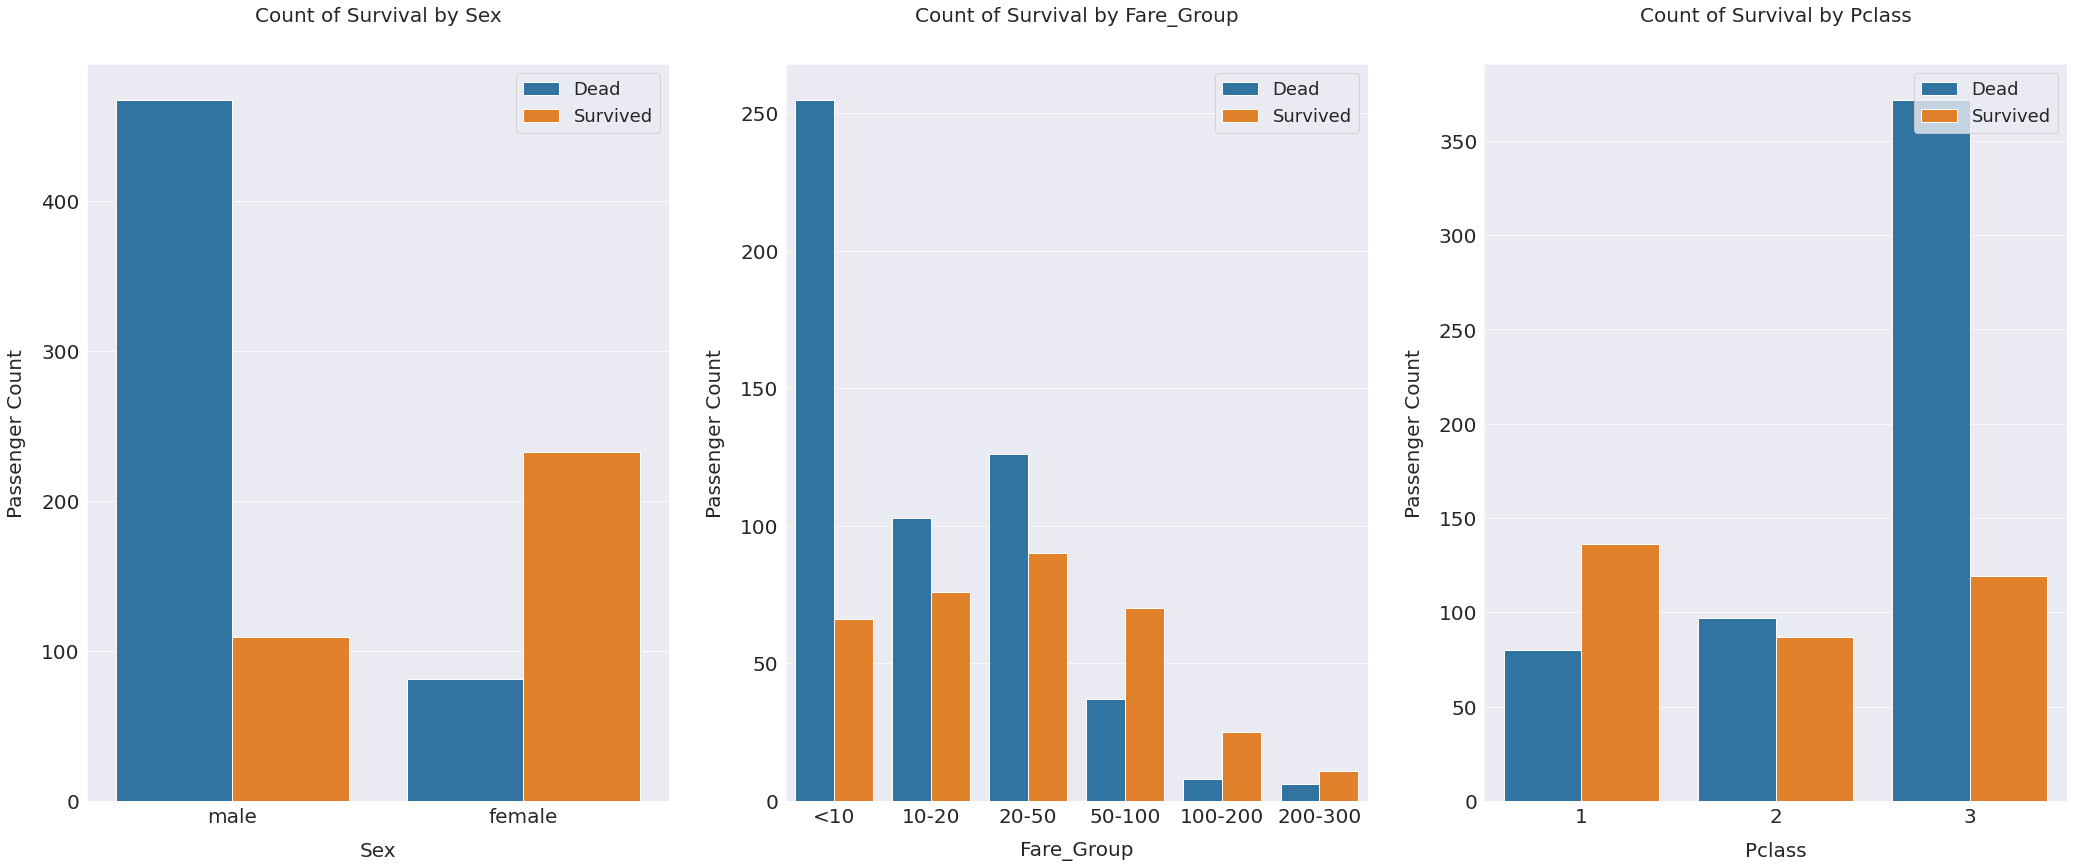

In [89]:
feat = ['Sex', 'Fare_Group','Pclass']

fig2, ax2 = plt.subplots(figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)
sns.set_style("darkgrid")
for i, f in enumerate(feat, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=f, hue='Survived', data=train)
    
    plt.xlabel('{}'.format(f), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Dead', 'Survived'], loc='upper right', prop={'size': 18})
    plt.title('Count of Survival by {}'.format(f), size=20, y=1.05)

plt.show()

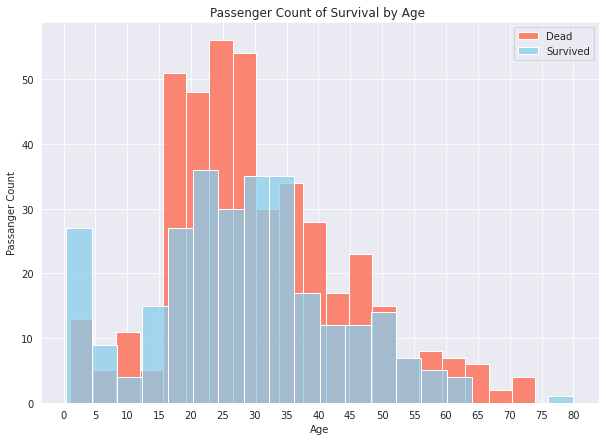

In [24]:
fig2, ax2 = plt.subplots()

sur = train.loc[train['Survived'] == 1] 
dead = train.loc[train['Survived'] == 0] 


ax2 = sns.histplot(data = dead['Age'].dropna(),color="tomato",bins=20,label="Dead")
ax2 = sns.histplot(data = sur['Age'].dropna(),color="skyblue",bins=20,label="Survived")


ax2.set_title('Passenger Count of Survival by Age ')
ax2.set_xlabel('Age')
ax2.set_ylabel('Passanger Count')
ax2.set_xticks(np.arange(0,85,5.0))# change the default xticks
ax2.legend()

fig2.set_figwidth(10)
fig2.set_figheight(7)

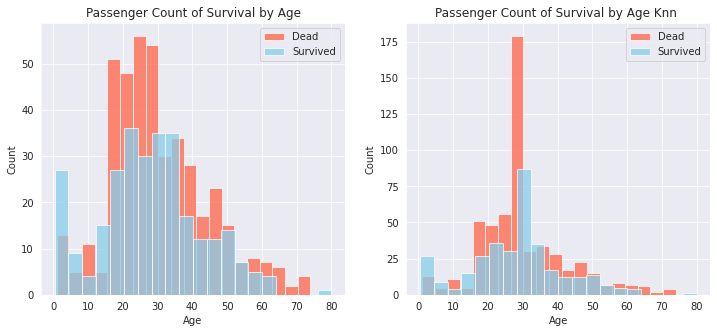

In [50]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)

sur = train.loc[train['Survived'] == 1] 
dead = train.loc[train['Survived'] == 0] 
sur_knn = train_knn.loc[train_knn['Survived'] == 1] 
dead_knn = train_knn.loc[train_knn['Survived'] == 0] 


ax1 = sns.histplot(ax = ax1,data = dead['Age'].dropna(),color="tomato",bins=20,label="Dead")
ax1 = sns.histplot(ax = ax1,data = sur['Age'].dropna(),color="skyblue",bins=20,label="Survived")


ax1.set_title('Passenger Count of Survival by Age')
#ax1.set_xlabel('Age')
#ax1.set_ylabel('Passanger Count')
#ax1.set_xticks(np.arange(0,85,5.0))# change the default xticks

ax2 = sns.histplot(ax =ax2,data = dead_knn['Age'],color="tomato",bins=20,label="Dead")
ax2 = sns.histplot(ax =ax2,data = sur_knn['Age'],color="skyblue",bins=20,label="Survived")
ax2.set_title('Passenger Count of Survival by Age Knn ')
#ax2.set_xlabel('Age')
#ax2.set_ylabel('Passanger Count')
#ax2.set_xticks(np.arange(0,85,5.0))# change the default xticks
ax1.legend()
ax2.legend()

fig.set_figwidth(12)
fig.set_figheight(5)

In [65]:
train['Sex_n'] = train['Sex'].apply(lambda x: 1 if x=='female' else 0)

In [87]:
train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Fare_Group     category
Age_Group      category
Sex_n             int64
Age_Group_n     float64
dtype: object

In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Group,Age_Group,Sex_n,Age_Group_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,<10,Youth,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,50-100,Adults,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,<10,Adults,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,50-100,Adults,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,<10,Adults,0,3


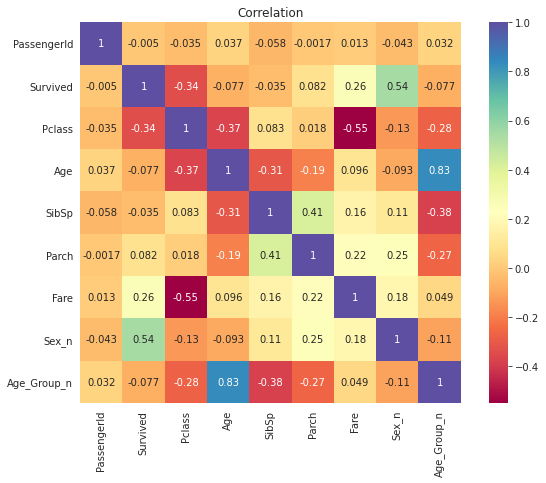

In [88]:
fig, ax = plt.subplots()

ax = sns.heatmap(train.corr(),annot=True,cmap=sns.color_palette("Spectral", as_cmap=True),square=True)


ax.set_title("Correlation")
fig.set_figwidth(10)
fig.set_figheight(7)

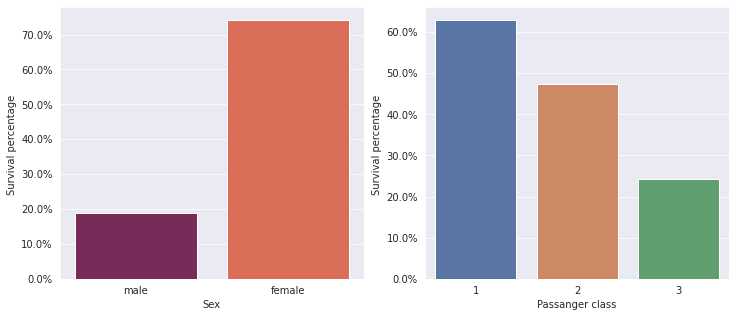

In [44]:
fig, (ax1,ax2) = plt.subplots(1,2)
def percent(x,pos):
    return '{:1.1f}%'.format(x*100)
ax1.yaxis.set_major_formatter(percent)

ax1 = sns.barplot(ax=ax1,x='Sex',y='Survived',data=train,ci=None,palette="rocket")
ax1.set_xlabel('Sex')
ax1.set_ylabel('Survival percentage ')


ax1.yaxis.set_major_formatter(percent)

ax2 = sns.barplot(ax=ax2,x='Pclass',y='Survived',data=train,ci=None,palette="deep")
ax2.yaxis.set_major_formatter(percent)

ax2.set_xlabel('Passanger class')
ax2.set_ylabel('Survival percentage ')


fig.set_figwidth(12)
fig.set_figheight(5)

In [26]:
import missingno

<AxesSubplot:>

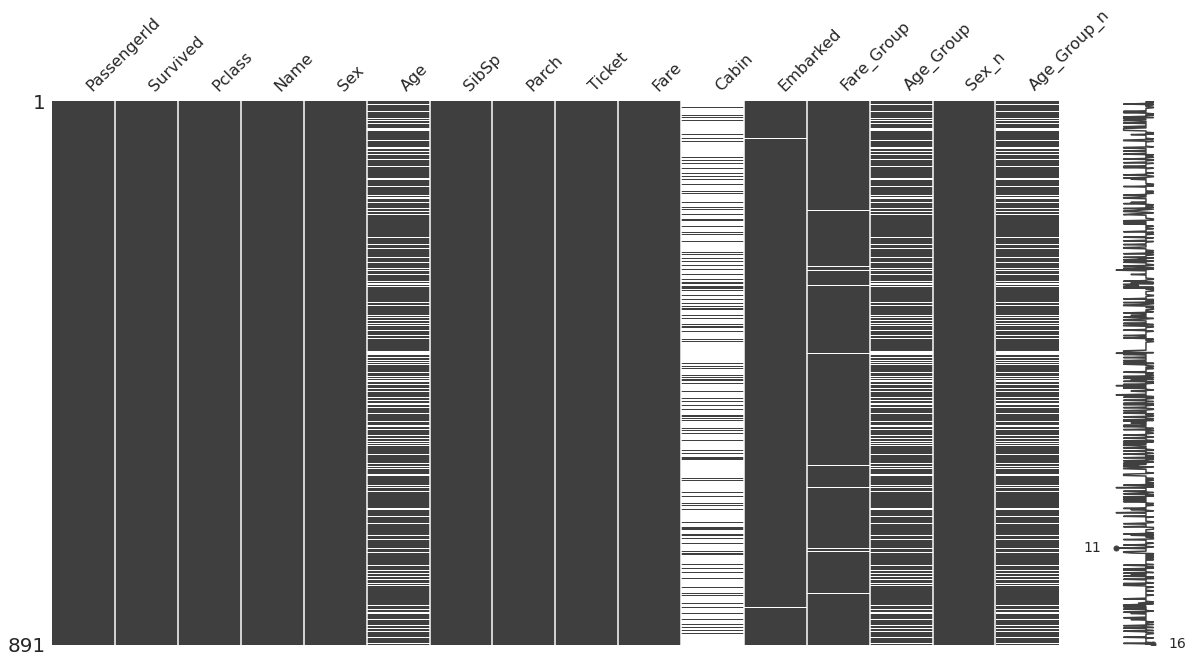

In [90]:
missingno.matrix(train, figsize = (20,10)) # missing data

<AxesSubplot:>

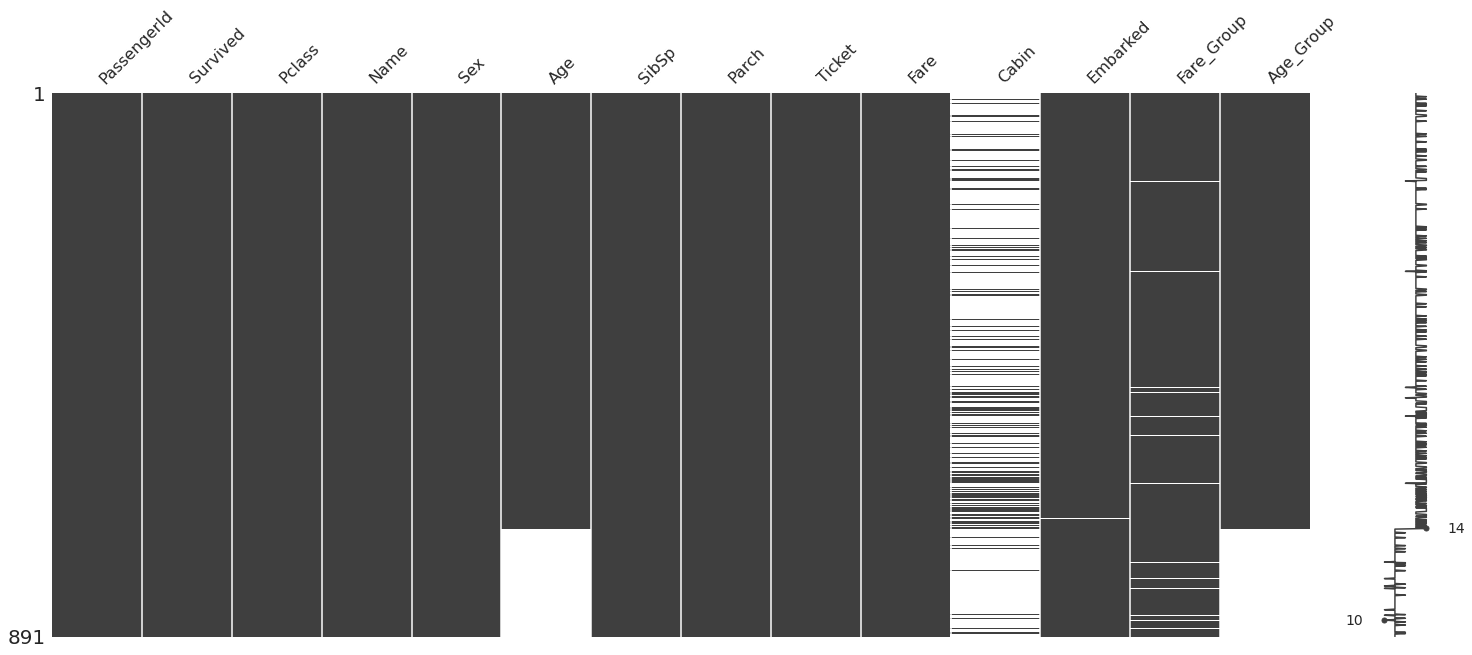

In [28]:
sorted = train.sort_values('Age')
missingno.matrix(sorted)

In [29]:
sorted.tail(180)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Group,Age_Group
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,20-50,Seniors
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,<10,Seniors
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,20-50,Seniors
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,<10,NaN
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,10-20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,<10,NaN
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,50-100,NaN
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,<10,NaN
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,<10,NaN


In [30]:
from sklearn.impute import KNNImputer

In [31]:
train_knn =train.copy()
knn_imputer = KNNImputer(n_neighbors=2,weights="uniform")
train_knn['Age'] = knn_imputer.fit_transform(train_knn[['Age']])

In [36]:
train_knn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Group,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,<10,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,50-100,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,<10,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,50-100,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,<10,Adults


In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Group,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,<10,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,50-100,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,<10,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,50-100,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,<10,Adults


<AxesSubplot:>

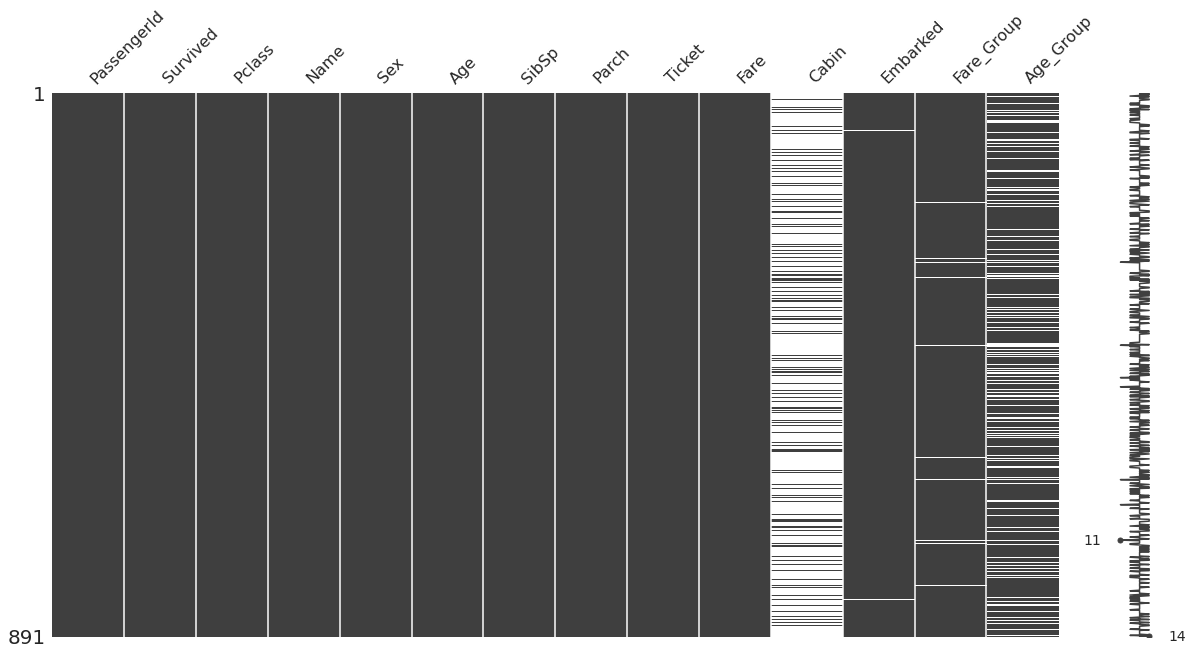

In [34]:
missingno.matrix(train_knn, figsize = (20,10)) # missing data

<AxesSubplot:>

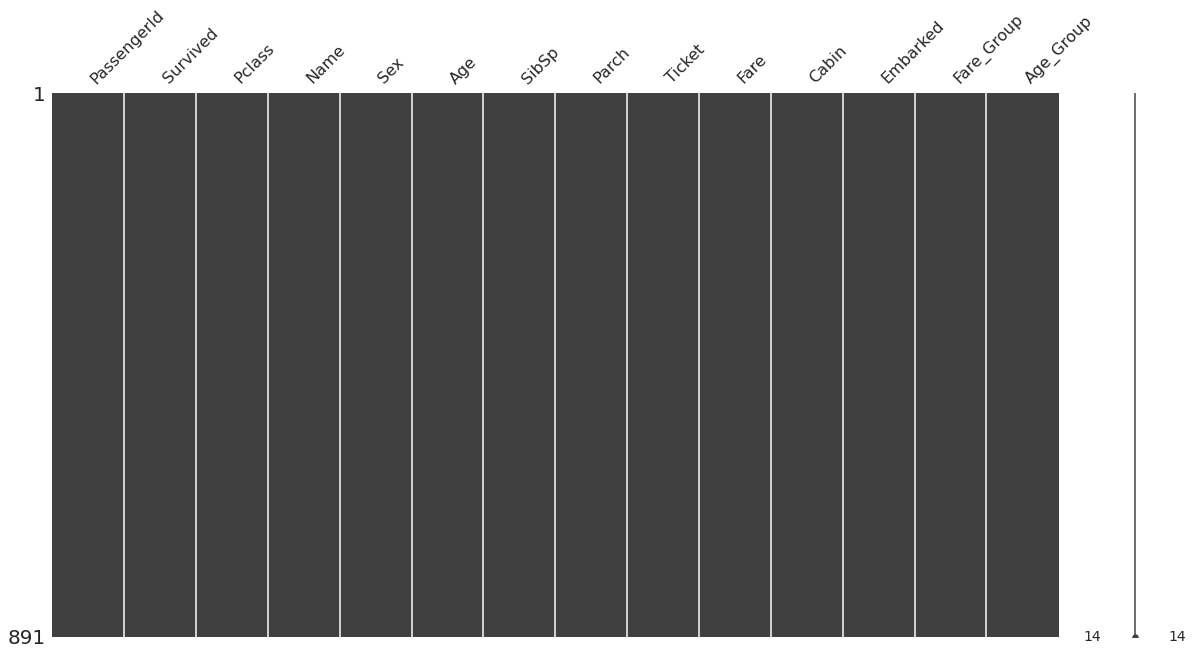

In [55]:
missingno.matrix(train_con, figsize = (20,10)) # missing data

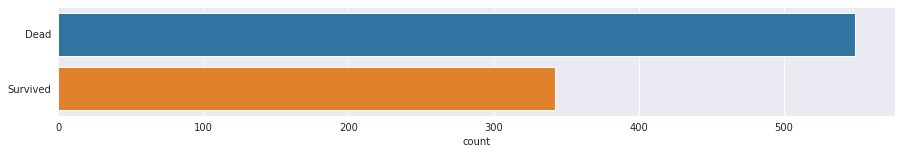

In [35]:
fig3, ax3 = plt.subplots()

# How many people survived?
#fig = plt.figure(figsize=(20,1))
ax3 = sns.countplot(y='Survived', data=train)
ax3.set_yticklabels(['Dead','Survived'])
fig3.set_figwidth(15)
fig3.set_figheight(2)
ax3.set_ylabel('')


plt.show()

In [77]:

    for j,row in train.iterrows():
        if row['Age_Group']== 'Children':
            train.loc[j,'Age_Group_n']= 1
        elif row['Age_Group'] == 'Youth':
            train.loc[j,'Age_Group_n'] = 2
        elif row['Age_Group'] == 'Adults':
            train.loc[j,'Age_Group_n'] = 3
        elif row['Age_Group'] == 'Seniors':
            train.loc[j,'Age_Group_n'] = 4
        

In [81]:
train = train.drop(columns=['color'])

In [75]:
train['Age_Group'].unique()

['Youth', 'Adults', NaN, 'Children', 'Seniors']
Categories (4, object): ['Children' < 'Youth' < 'Adults' < 'Seniors']

In [93]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Group,Age_Group,Sex_n,Age_Group_n,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,<10,Youth,0,2.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,50-100,Adults,1,3.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,<10,Adults,1,3.0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,50-100,Adults,1,3.0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,<10,Adults,0,3.0,0,1


In [85]:
train[['Age_Group_n']] = train[['Age_Group_n']].apply(pd.to_numeric)

In [95]:
train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Fare_Group     category
Age_Group      category
Sex_n             int64
Age_Group_n     float64
Sex_female        uint8
Sex_male          uint8
dtype: object

In [92]:
columns_to_category = ['Sex']
train[columns_to_category] = train[columns_to_category].astype('category') # change datetypes to category
train = pd.get_dummies(train, columns=columns_to_category) # One hot encoding the categories

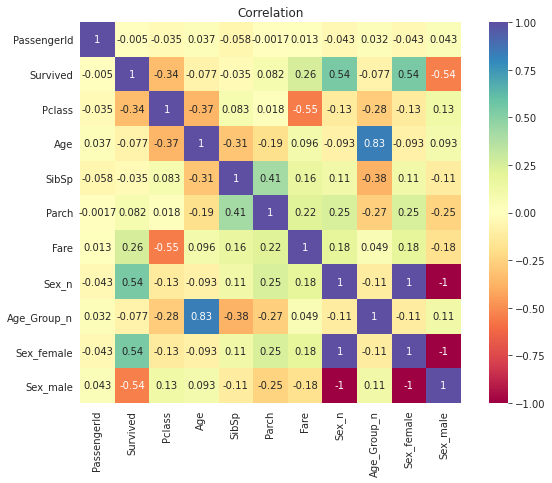

In [94]:
fig, ax = plt.subplots()

ax = sns.heatmap(train.corr(),annot=True,cmap=sns.color_palette("Spectral", as_cmap=True),square=True)


ax.set_title("Correlation")
fig.set_figwidth(10)
fig.set_figheight(7)

In [ ]:
train.get